# Question 1

>Response: looking at the data plotted, the `myPower` looks fairly definitively linear, whereas the `myPowerSmart` shows the logarithmic "flattening" that we hope for. It "might" be faster at first, but `mySmartPower` has a better asymptotic behaviour.

# Question 2

- (a) seems like a trick question. often the CPU architecture determins, but a 'byte' is 8 bits. in a 32bit CPU, an int can occupry 32 bits. I started on 8 bit CPU's --- 2^8, then 2^16, then 2^32, now we have mostly 2^64.

- (b) $ \large log_2(n) $   -- in python:`log(n, 2)`

- (c) $ \large log_2(n) $   -- in python:`log(n, 2)`

- (d) $ \large log_c(n) $   -- in python:`log(n, c)`


# Question 3

- (a) given an underlying array of fixed size, that we keep track of the total # elements in that array with some value `n` -- we can

```
while i < n:
    L[i] = L[i+1]
    if i == n:
        break
    i = i + 1
```

- (b) move the last element into the slot that we want to delete... Google asked me this question in an interview once.

```
L[i] = L[n]
n = n - 1
```



# Question 4

- (a) since both $ log_2(n) $ and $ log_c(n) $ represent algorithms that "flatten" as `n` increases, the relative importance is that they are more efficient than  `O(n)` or even an exponential growth. Given `c` is constant, with the log identity we have

  $ \large  log_c * n = log_2 * c * log_2 * n $   -- so, essentially we have $ log_2 * n $ as THE varying part of the running time.
  
  
- (b)
Ranking:

    - $ n^n $
    - $ n! $
    - $ n^3 $
    - $ n^2 $
    - $ n $
    - $ log_2 n $


# Question 6
Nested looping via brute force is the simple answer. 

- $ running time =O(n^3) $

>Note: this looked promising: [Efficient Ramanujan](https://www.ocf.berkeley.edu/~wwu/cgi-bin/yabb/YaBB.cgi?board=riddles_cs;action=display;num=1288192473)

In [11]:
## Question 6 Code: 



from math import pow, log
from collections import namedtuple

ramanujan = namedtuple('ramanujan', 'a b c d')
# brute force...
def pr(n):
    rv = []
    for a in range(n+1): # O(n)
        for b in range(n+1): # O(n)
            for c in range(n+1): # O(n)
                d = n - (a+b+c)
                if (pow(a,3)+pow(b,3) == pow(c,3)+ pow(d,3)):
                    rv.append(ramanujan(a,b,c,d))
                    
    return rv



result = pr(20)
result

[ramanujan(a=0, b=10, c=0, d=10),
 ramanujan(a=0, b=10, c=10, d=0),
 ramanujan(a=1, b=9, c=1, d=9),
 ramanujan(a=1, b=9, c=9, d=1),
 ramanujan(a=2, b=8, c=2, d=8),
 ramanujan(a=2, b=8, c=8, d=2),
 ramanujan(a=3, b=7, c=3, d=7),
 ramanujan(a=3, b=7, c=7, d=3),
 ramanujan(a=4, b=6, c=4, d=6),
 ramanujan(a=4, b=6, c=6, d=4),
 ramanujan(a=5, b=5, c=5, d=5),
 ramanujan(a=6, b=4, c=4, d=6),
 ramanujan(a=6, b=4, c=6, d=4),
 ramanujan(a=6, b=10, c=12, d=-8),
 ramanujan(a=7, b=3, c=3, d=7),
 ramanujan(a=7, b=3, c=7, d=3),
 ramanujan(a=8, b=2, c=2, d=8),
 ramanujan(a=8, b=2, c=8, d=2),
 ramanujan(a=9, b=1, c=1, d=9),
 ramanujan(a=9, b=1, c=9, d=1),
 ramanujan(a=10, b=0, c=0, d=10),
 ramanujan(a=10, b=0, c=10, d=0),
 ramanujan(a=10, b=6, c=12, d=-8)]

In [12]:
import math
math.pow(3,2)

9.0

# Addendum

## Question 1 Work.

In [13]:
def myPower(x,k,p):         

  y = 1                      
  for i in range(k+1):         
    y = y*x % p              
  return y               # running time O(k)


# x**k mod p: Simple recursive computation
#  x^k = x* x^(k-1)

def myPowerRec(x,k,p):         
  if k==1:
    return x % p                 
  z = myPowerRec(x,k-1,p)       
  y = x*z % p                      
  return y               # running time O(k)

# x**k mod p: Smart recursive computation
# x^k = x^(k/2)*x^(k/2)    if k is even
# x^k = x^(k/2)*x^(k/2)*x  if k is odd

def myPowerSmart(x,k,p):        
  if k==1:
    return x % p                 
  r = k % 2                      
  k = k // 2   
  z = myPowerSmart(x,k,p)       
  if r == 0:                     
    y = z*z  % p                 
  else:               
    y = z*z*x   % p              
  return y              # running time O(log k)

--- 0.00013184547424316406 seconds ---
for k = 10 --- hh:mm::ss.ms: 0:00:00.000008
--- 0.0001373291015625 seconds ---
for k = 100 --- hh:mm::ss.ms: 0:00:00.000009
--- 0.00011587142944335938 seconds ---
for k = 1000 --- hh:mm::ss.ms: 0:00:00.000008
--- 0.00011205673217773438 seconds ---
for k = 10000 --- hh:mm::ss.ms: 0:00:00.000009
--- 0.00010967254638671875 seconds ---
for k = 100000 --- hh:mm::ss.ms: 0:00:00.000010
--- 0.00011181831359863281 seconds ---
for k = 1000000 --- hh:mm::ss.ms: 0:00:00.000010
--- 0.0001087188720703125 seconds ---
for k = 10 --- hh:mm::ss.ms: 0:00:00.000006
--- 0.0001087188720703125 seconds ---
for k = 100 --- hh:mm::ss.ms: 0:00:00.000007
--- 0.00010704994201660156 seconds ---
for k = 1000 --- hh:mm::ss.ms: 0:00:00.000007
--- 0.00014209747314453125 seconds ---
for k = 10000 --- hh:mm::ss.ms: 0:00:00.000011
--- 0.00011897087097167969 seconds ---
for k = 100000 --- hh:mm::ss.ms: 0:00:00.000010
--- 0.00012111663818359375 seconds ---
for k = 1000000 --- hh:mm::ss

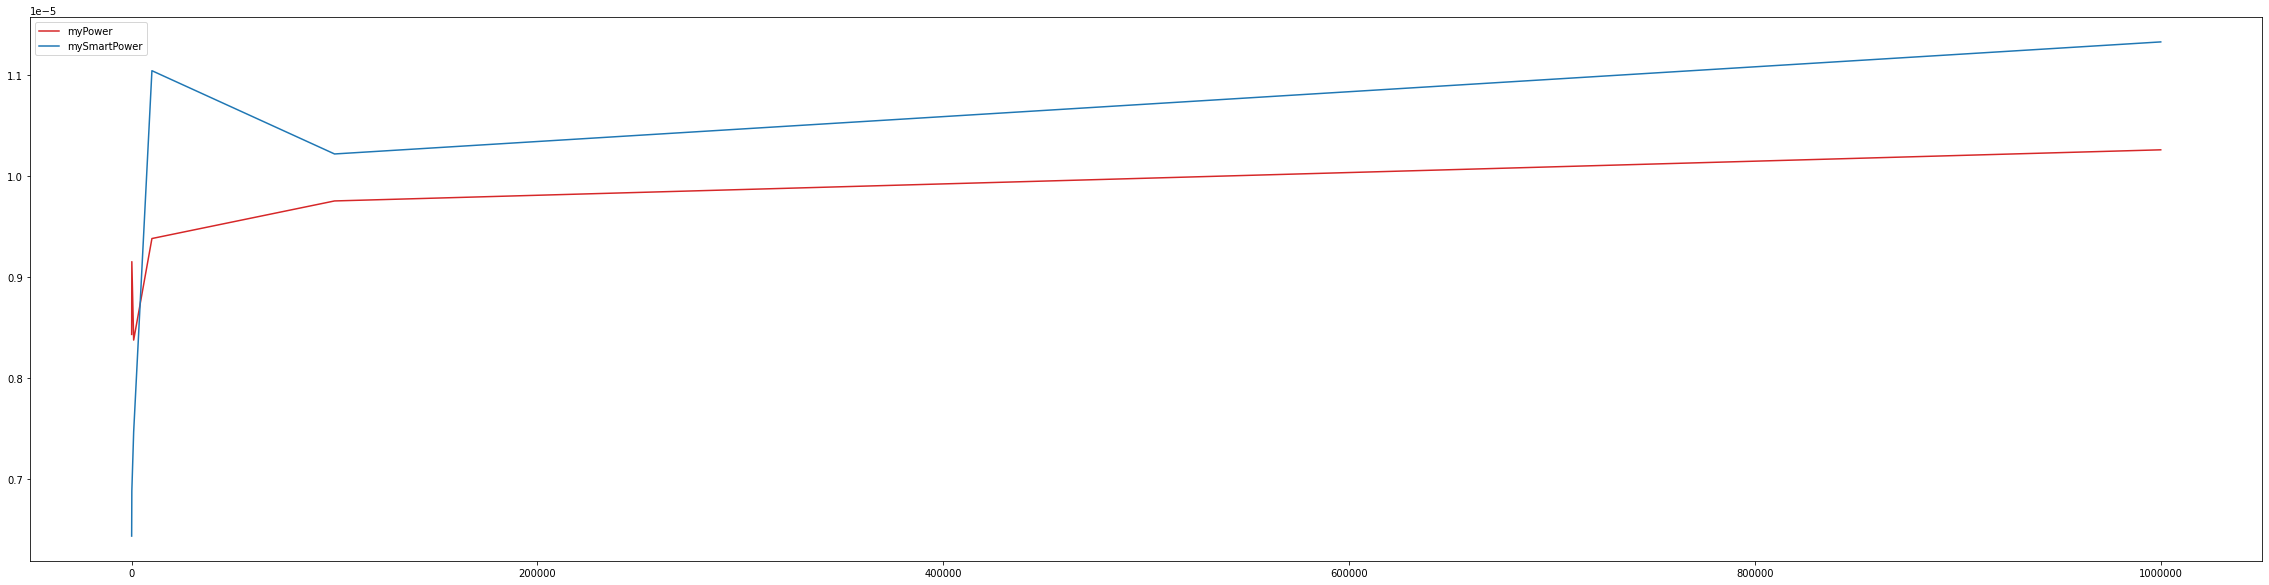

In [14]:
import datetime
from time import time as tm
import timeit
def getMinsSeconds(s):
    return str(datetime.timedelta(seconds=s))

def timeStatement(rawCode):
    rv = []
    repeat = 1
    kRange = [10, 100, 1000, 10000, 100000, 1000000]#, 10000000]
    for k in kRange:
        statement = rawCode.format(k)
        start_time = tm()
        #s = (timeit.timeit(statement, number = repeat)) / repeat
        s = (timeit.timeit(statement, number=repeat))
        print("--- {} seconds ---".format(tm() - start_time))
        rv.append([k,s])
        print("for k = {} --- hh:mm::ss.ms: {}".format(k, getMinsSeconds(s)))
        
    return rv


        
statement_Smart='''
from __main__ import myPowerSmart
from __main__ import myPower

x = 2
p = 10

myPowerSmart(x, {}, p)

'''
        
        
statement_Regular='''
from __main__ import myPowerSmart
from __main__ import myPower

x = 2
p = 10

myPowerSmart(x, {}, p)

'''
    
t_one = timeStatement(statement_Regular)
t_two = timeStatement(statement_Smart)

import matplotlib.pyplot as plt
figsize = (40,10)
fix, ax = plt.subplots(1,1, figsize=figsize)


y1 = [row[1] for row in t_one]
x1 = [row[0] for row in t_one]

y2 = [row[1] for row in t_two]
x2 = [row[0] for row in t_two]

plt.plot(x1, y1, 'tab:red', label='myPower')
plt.plot(x2, y2, 'tab:blue', label='mySmartPower')
#ax.ticklabel_format(useOffset=False, style='plain')
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.legend()


plt.show()

for k = 10 --- hh:mm::ss.ms: 0:00:00.000002
for k = 100 --- hh:mm::ss.ms: 0:00:00.000005
for k = 1000 --- hh:mm::ss.ms: 0:00:00.000047
for k = 10000 --- hh:mm::ss.ms: 0:00:00.000467
for k = 100000 --- hh:mm::ss.ms: 0:00:00.004870
for k = 1000000 --- hh:mm::ss.ms: 0:00:00.056127
for k = 10 --- hh:mm::ss.ms: 0:00:00.000002
for k = 100 --- hh:mm::ss.ms: 0:00:00.000003
for k = 1000 --- hh:mm::ss.ms: 0:00:00.000003
for k = 10000 --- hh:mm::ss.ms: 0:00:00.000004
for k = 100000 --- hh:mm::ss.ms: 0:00:00.000005
for k = 1000000 --- hh:mm::ss.ms: 0:00:00.000006


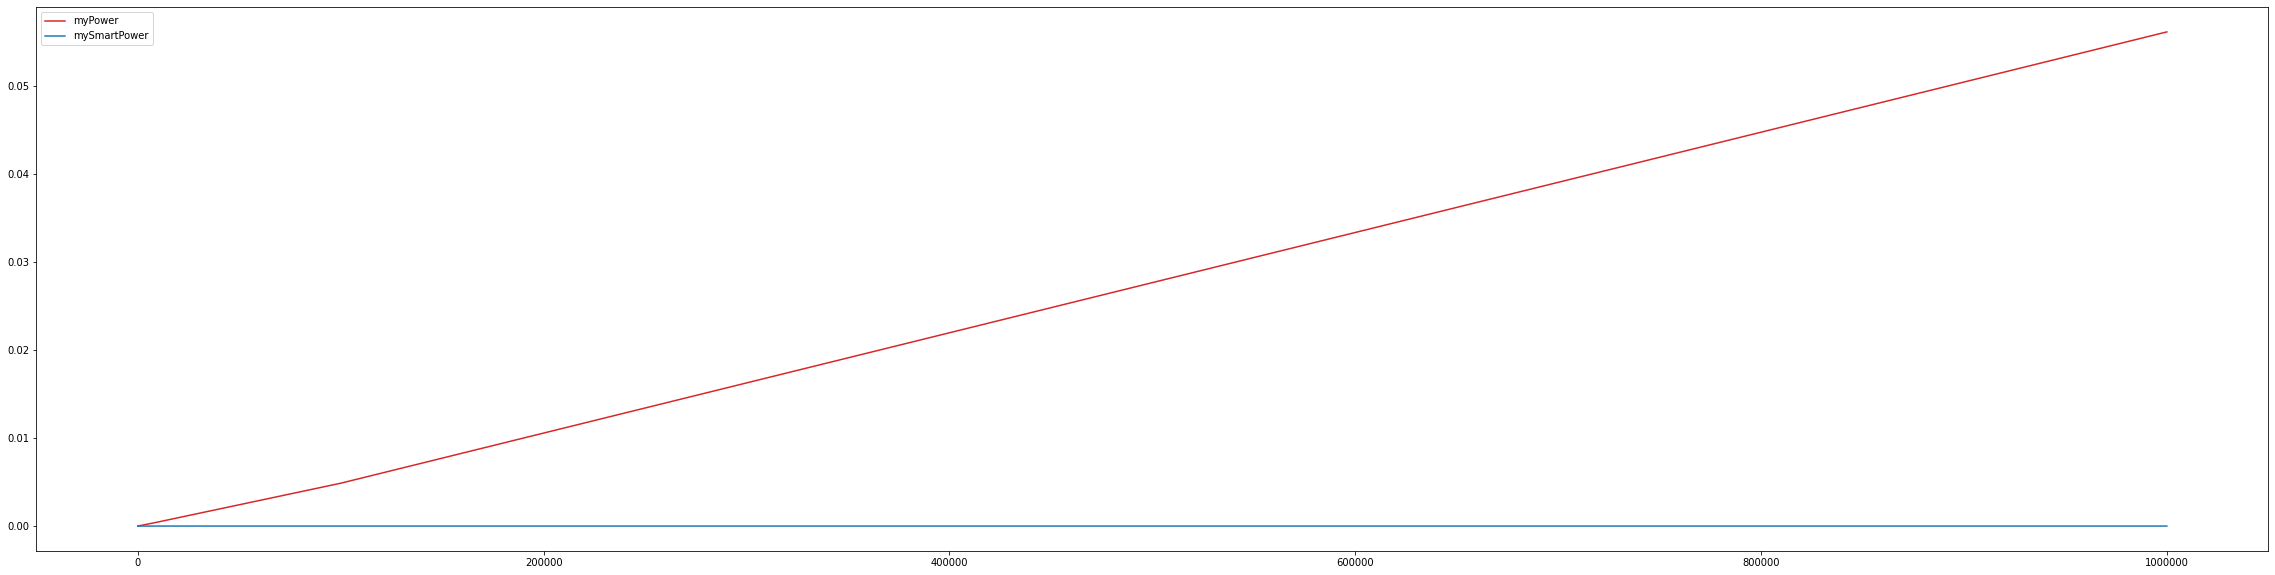

In [15]:
def timeStatementEasy(f):
    rv = []
    x = 2
    p = 10
    kRange = [10, 100, 1000, 10000, 100000, 1000000]#, 10000000]
    for k in kRange:
        start_time = tm()
        f(x,k,p)
        s = tm() - start_time
        rv.append([k,s])
        print("for k = {} --- hh:mm::ss.ms: {}".format(k, getMinsSeconds(s)))
        
    return rv

t_one_b = timeStatementEasy(myPower)
t_two_b = timeStatementEasy(myPowerSmart)


import matplotlib.pyplot as plt
figsize = (40,10)
fix, ax = plt.subplots(1,1, figsize=figsize)


y1 = [row[1] for row in t_one_b]
x1 = [row[0] for row in t_one_b]

y2 = [row[1] for row in t_two_b]
x2 = [row[0] for row in t_two_b]

plt.plot(x1, y1, 'tab:red', label='myPower')
plt.plot(x2, y2, 'tab:blue', label='mySmartPower')
#ax.ticklabel_format(useOffset=False, style='plain')
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.legend()


plt.show()

In [16]:
## Question 2 work...

from math import log

print(log(16,2))
print(log(64,2))

print(log(16,1/2))
print(log(64,1/2))


print(log(16,4))
print(log(64,4))


4.0
6.0
-4.0
-6.0
2.0
3.0


In [17]:
math.factorial(4)

24

In [18]:
math.pow(4, 4)

256.0

In [19]:
log(2,2)

1.0

In [20]:
log(3,2)

1.5849625007211563